In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_test.shape

(367, 12)

In [4]:
df_train.shape

(614, 13)

In [5]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
def missingdata():
    total = df_train.isnull().sum().sort_values(ascending=False)
    percent = ((df_train.isnull().sum()/df_train.isnull().count())*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data)

In [7]:
missingdata()

                   Total   Percent
Credit_History        50  8.143322
Self_Employed         32  5.211726
LoanAmount            22  3.583062
Dependents            15  2.442997
Loan_Amount_Term      14  2.280130
Gender                13  2.117264
Married                3  0.488599
Loan_Status            0  0.000000
Property_Area          0  0.000000
CoapplicantIncome      0  0.000000
ApplicantIncome        0  0.000000
Education              0  0.000000
Loan_ID                0  0.000000


In [8]:
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].dropna().mode().values[0] )

df_train['Married'] = df_train['Married'].fillna(df_train['Married'].dropna().mode().values[0] )

df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].dropna().mode().values[0] )

df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].dropna().mode().values[0] )

df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].dropna().median() )

df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].dropna().mode().values[0] )

df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].dropna().mode().values[0] )

In [9]:
missingdata()

                   Total  Percent
Loan_Status            0      0.0
Property_Area          0      0.0
Credit_History         0      0.0
Loan_Amount_Term       0      0.0
LoanAmount             0      0.0
CoapplicantIncome      0      0.0
ApplicantIncome        0      0.0
Self_Employed          0      0.0
Education              0      0.0
Dependents             0      0.0
Married                0      0.0
Gender                 0      0.0
Loan_ID                0      0.0


In [10]:
df_train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Gender'>

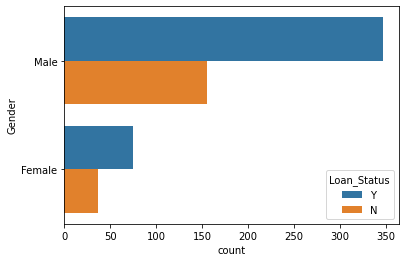

In [11]:
sns.countplot(y= 'Gender', hue= 'Loan_Status', data = df_train)

<AxesSubplot:xlabel='count', ylabel='Married'>

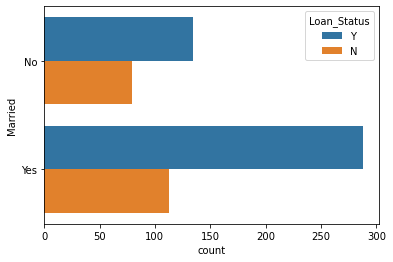

In [12]:
sns.countplot(y= 'Married', hue= 'Loan_Status', data = df_train)

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

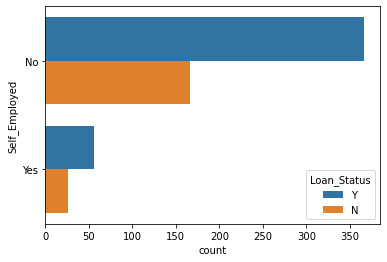

In [13]:
sns.countplot(y= 'Self_Employed', hue= 'Loan_Status', data = df_train)

<AxesSubplot:xlabel='count', ylabel='Credit_History'>

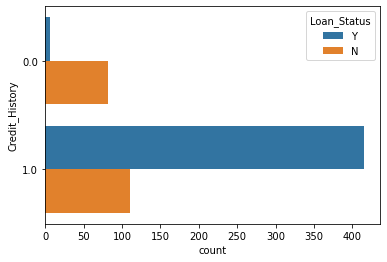

In [14]:
sns.countplot(y= 'Credit_History', hue= 'Loan_Status', data = df_train)

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

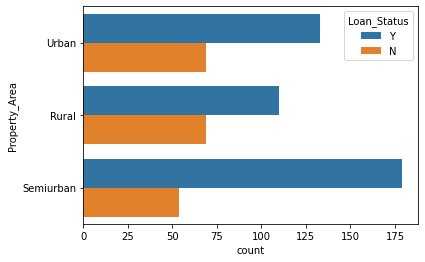

In [15]:
sns.countplot(y= 'Property_Area', hue= 'Loan_Status', data = df_train)

<AxesSubplot:xlabel='count', ylabel='Loan_Amount_Term'>

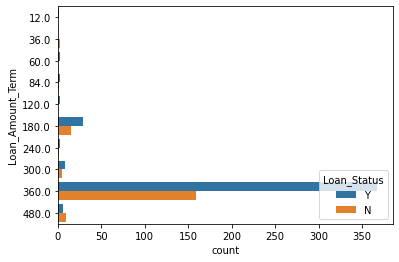

In [16]:
sns.countplot(y= 'Loan_Amount_Term', hue= 'Loan_Status', data = df_train)

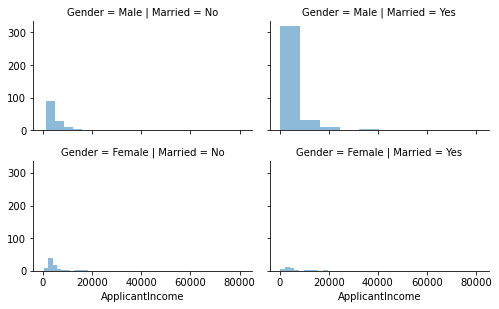

In [17]:
grid = sns.FacetGrid(df_train, row='Gender', col='Married', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha= 0.5, bins=10)

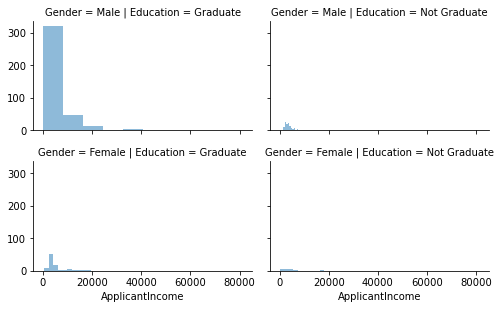

In [18]:
grid = sns.FacetGrid(df_train, row='Gender', col='Education', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha= 0.5, bins=10)

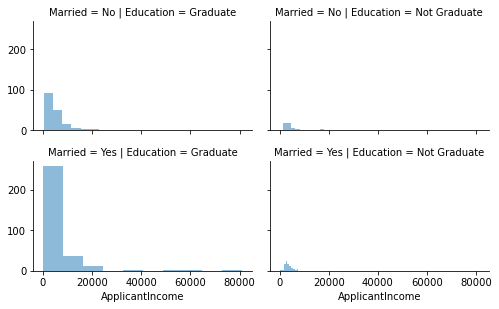

In [19]:
grid = sns.FacetGrid(df_train, row='Married', col='Education', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha= 0.5, bins=10)

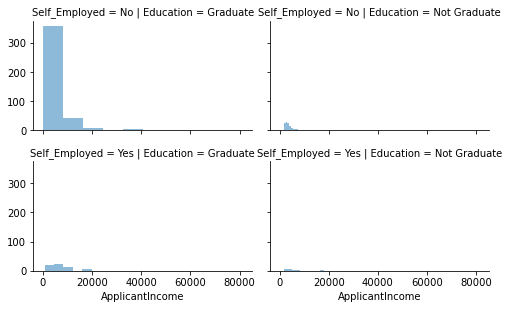

In [20]:
grid = sns.FacetGrid(df_train, row='Self_Employed', col='Education', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha= 0.5, bins=10)

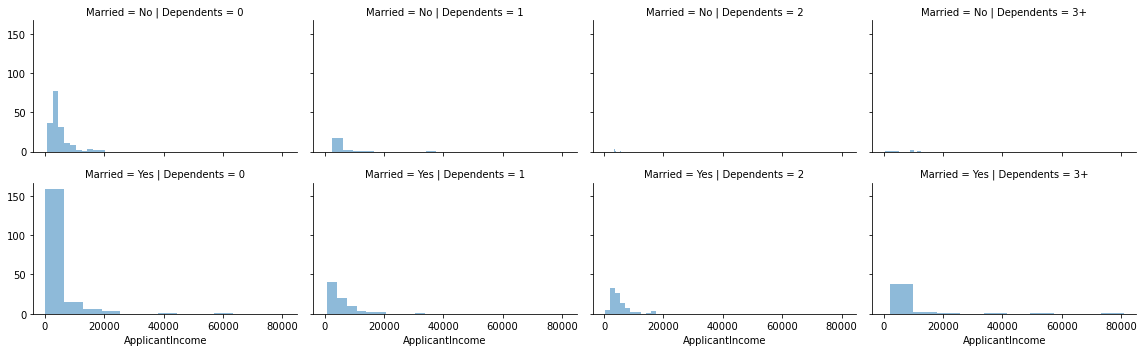

In [21]:
grid = sns.FacetGrid(df_train, row='Married', col='Dependents', height=2.5, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha= 0.5, bins=10)

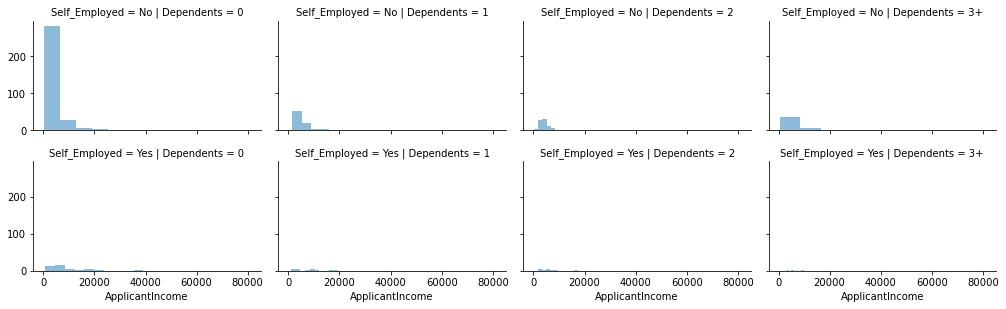

In [22]:
grid = sns.FacetGrid(df_train, row='Self_Employed', col='Dependents', height=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha= 0.5, bins=10)

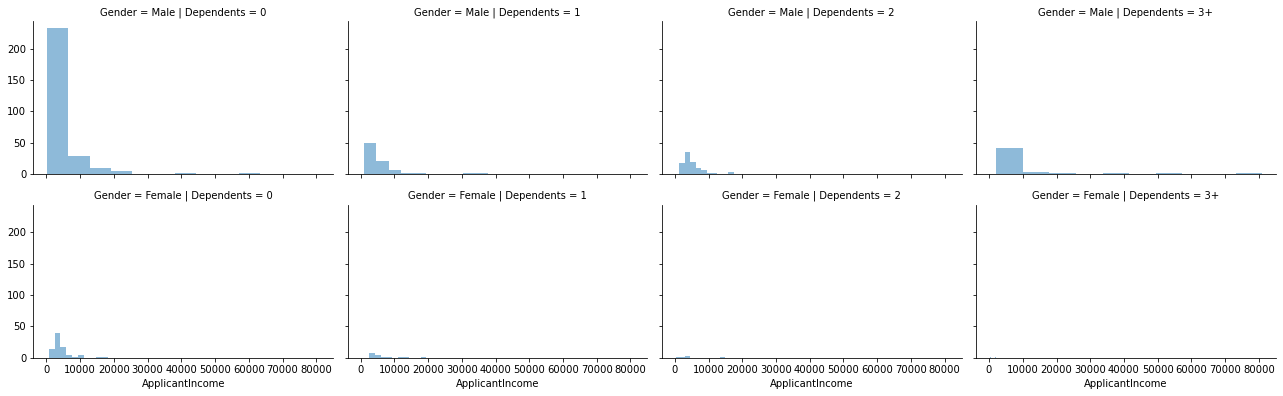

In [23]:
grid = sns.FacetGrid(df_train, row='Gender', col='Dependents', height=2.8, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha= 0.5, bins=10)

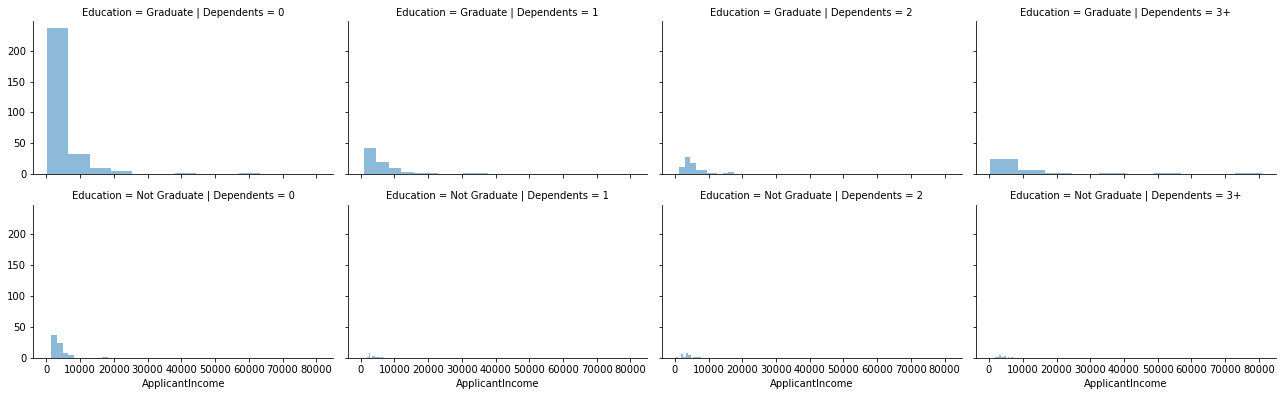

In [24]:
grid = sns.FacetGrid(df_train, row='Education', col='Dependents', height=2.8, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha= 0.5, bins=10)

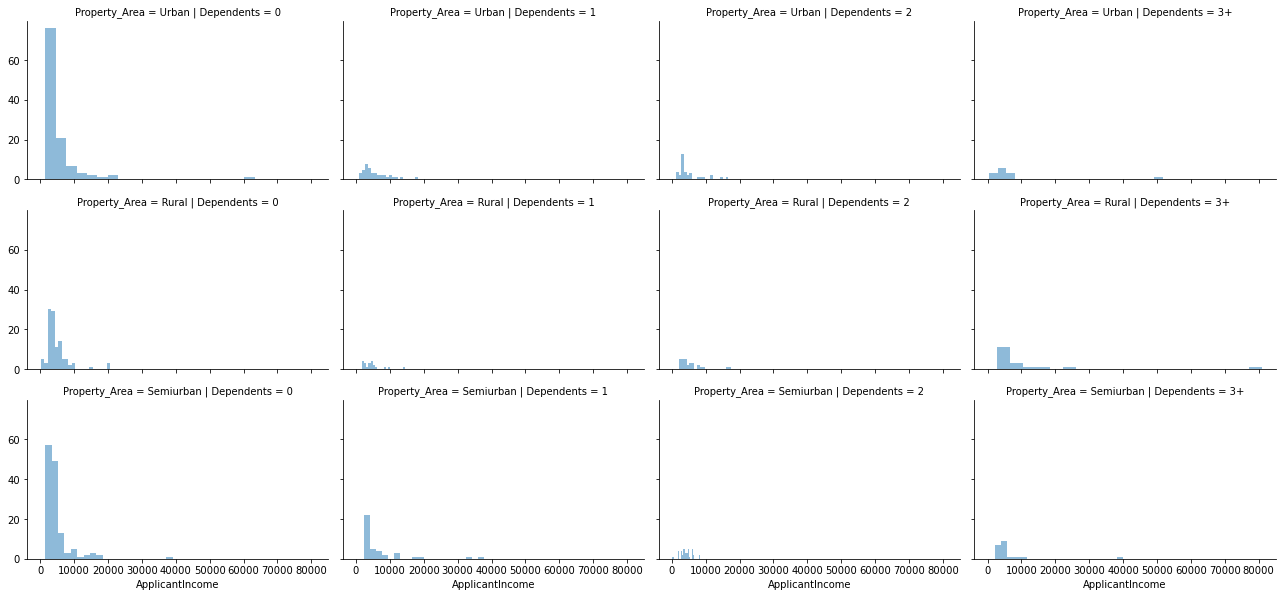

In [25]:
grid = sns.FacetGrid(df_train, row='Property_Area', col='Dependents', height=2.8, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha= 0.5, bins=20)

In [26]:
code_numeric = {'Male': 1, 'Female': 2, 'Yes': 1, 'No': 2, 'Graduate': 1, 'Not Graduate': 2, 'Urban': 3, 'Semiurban': 2,'Rural': 1, 'Y': 1, 'N': 0, '3+': 3}

In [27]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df_train = df_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
df_test = df_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [29]:
df_train.drop('Loan_ID', axis = 1, inplace = True)

In [30]:
df_train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 57.6+ KB


In [33]:
df_train['Dependents'].head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: object

In [34]:
Dependents_ = pd.to_numeric(df_train.Dependents)
Dependents__ = pd.to_numeric(df_test.Dependents)

In [35]:
df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)

In [36]:
df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test = pd.concat([df_test, Dependents__], axis = 1)

<AxesSubplot:>

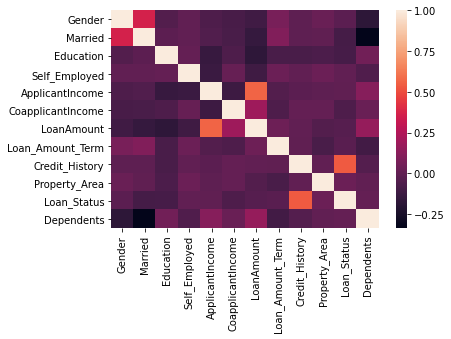

In [37]:
sns.heatmap(df_train.corr())

In [39]:
y = df_train['Loan_Status']
X = df_train.drop('Loan_Status', axis = 1)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [46]:
model = LogisticRegression()

model.fit(X_train, y_train)

ypred = model.predict(X_test)

C:\Users\ARYAN GUPTA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
ev = f1_score(y_test, ypred)
ev

0.8979591836734695

In [50]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
ypredt = dtree.predict(X_test)

In [52]:
ev1 = f1_score(y_test, ypredt)
ev1

0.7692307692307693

In [53]:
rfrt = RandomForestClassifier()

In [54]:
rfrt.fit(X_train, y_train)

C:\Users\ARYAN GUPTA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
predtr = rfrt.predict(X_test)

In [59]:
f1_score(y_test, predtr)

0.8156424581005587

In [60]:
from sklearn.externals import joblib
joblib.dump([model, dtree], 'mymodel.pkl')

['mymodel.pkl']

In [61]:
models = joblib.load('mymodel.pkl')

In [62]:
models

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best')]

In [68]:
a = models[0].predict(X_test)

In [69]:
f1_score(y_test, a)

0.8979591836734695